

## **Google Stock Price Prediction Using Comprehensive Regression Analysis**
##**Team name : Team Alpha**

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import random
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.utils import shuffle


# **LOADING THE DATA SET**

In [ ]:
df = pd.read_csv("google_stock_price.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...,...
4837,2023-11-06,130.220001,131.559998,129.929993,131.449997,131.449997,15360400
4838,2023-11-07,131.979996,133.279999,131.139999,132.399994,132.399994,19223800
4839,2023-11-08,132.360001,133.539993,132.160004,133.259995,133.259995,15093600
4840,2023-11-09,133.360001,133.960007,131.509995,131.690002,131.690002,17976500


In [ ]:
df.shape

(4842, 7)

# **DATA INFORMATION**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4842 entries, 0 to 4841
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4842 non-null   object 
 1   Open       4842 non-null   float64
 2   High       4842 non-null   float64
 3   Low        4842 non-null   float64
 4   Close      4842 non-null   float64
 5   Adj Close  4842 non-null   float64
 6   Volume     4842 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 264.9+ KB


# **NAN VALUE CHECKING**

In [ ]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


# **DATA DESCRIPTION**



In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4842.000000,4842.000000,4842.000000,4842.000000,4842.000000,4.842000e+03
mean,41.164402,41.601906,40.745188,41.181457,41.181457,1.192432e+08
std,38.267895,38.708231,37.871644,38.295204,38.295204,1.513840e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,12.819761,12.949089,12.702388,12.828043,12.828043,2.867350e+07
50%,26.470161,26.668148,26.259000,26.470153,26.470153,6.202500e+07
75%,57.197751,57.729501,56.633139,57.315001,57.315001,1.469819e+08
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09


# **HOW MUCH ONE FEATURE IS RELATED TO OTHER ONE**

In [ ]:
feature = df.columns

In [ ]:
print(feature)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [ ]:
feature = feature[1:]

In [ ]:
correlation = {}
for i in range(len(feature)) :
  for j in range(i +1):
    correlation[f"Correlation between {feature[i]} and {feature[j]}"] = df[feature[i]].corr(df[feature[j]])


In [ ]:
correlation

{'Correlation between Open and Open': np.float64(1.0),
 'Correlation between High and Open': np.float64(0.9999024265636497),
 'Correlation between High and High': np.float64(0.9999999999999998),
 'Correlation between Low and Open': np.float64(0.9998947550818423),
 'Correlation between Low and High': np.float64(0.9998741100411522),
 'Correlation between Low and Low': np.float64(1.0),
 'Correlation between Close and Open': np.float64(0.9997717806834042),
 'Correlation between Close and High': np.float64(0.9998934019677148),
 'Correlation between Close and Low': np.float64(0.9999027526730926),
 'Correlation between Close and Close': np.float64(1.0),
 'Correlation between Adj Close and Open': np.float64(0.9997717806834042),
 'Correlation between Adj Close and High': np.float64(0.9998934019677148),
 'Correlation between Adj Close and Low': np.float64(0.9999027526730926),
 'Correlation between Adj Close and Close': np.float64(1.0),
 'Correlation between Adj Close and Adj Close': np.float64(1

# **DATA PROCESSING**

In [ ]:
target_column = 'Close'
feature_to_drop = 'Date'

# Defining features and target
X = df.drop(['Close', 'Date'], axis = 1)
Y = df['Close']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# **Feature Scaling**

**I HAVE APPLIED THE STANDARIZATION (Z-score normalization, mean-centering and scaling by factor of standard deviation) FEATURE SCALING ONLY TO THE FEATURES COLUMNS**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Multiple Linear Regression through LinearRegression()**

# **When you use LinearRegression() from scikit-learn, even with multiple features, the model is fitted using the closed-form solution (also called the Normal Equation) — not through an iterative method like gradient descent.**

**Model call**

In [ ]:
model = LinearRegression()

**Model Train**

In [ ]:
start = time.time()
model.fit(X_train_scaled,Y_train)
end = time.time()
print('The model has been trained.')
print(f"The time required for model training is {end-start}")

The model has been trained.
The time required for model training is 0.020899534225463867


**Prediction on Train and Test dataset**

In [ ]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [ ]:
train_mse = mean_squared_error(Y_train, y_train_pred)
test_mse = mean_squared_error(Y_test, y_test_pred)

train_mae = mean_absolute_error(Y_train, y_train_pred)
test_mae = mean_absolute_error(Y_test, y_test_pred)

train_r2 = r2_score(Y_train, y_train_pred)
test_r2 = r2_score(Y_test, y_test_pred)

In [ ]:
diction = {
    "Train MSE": train_mse,
    "Test MSE": test_mse,
    "Train MAE": train_mae,
    "Test MAE": test_mae,
    "Train R²": train_r2,
    "Test R²": test_r2
}

result = pd.Series(diction)
print("Model Evaluation Results:\n")
print(result)

Model Evaluation Results:

Train MSE    7.732945e-29
Test MSE     6.249586e-29
Train MAE    4.721128e-15
Test MAE     4.334567e-15
Train R²     1.000000e+00
Test R²      1.000000e+00
dtype: float64


# **Manual Implemntation of Normal Equation(Closed Form Solution)**

# **Add bias term (column of ones) to X matrices**

In [ ]:
X_train_b = np.concatenate((np.ones((X_train_scaled.shape[0], 1)), X_train_scaled),axis = 1)
X_test_b = np.concatenate((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled) , axis = 1)

In [ ]:
X_train_b.shape

(3873, 6)

In [ ]:
X_test_b.shape

(969, 6)

# **Apply Normal Equation**

In [ ]:
theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(Y_train)


In [ ]:
theta_best.shape

(6,)

# **Make prediction**

In [ ]:
y_train_pred_ne = X_train_b.dot(theta_best)
y_test_pred_ne = X_test_b.dot(theta_best)

In [ ]:
y_train_pred_ne.shape

(3873,)

In [ ]:
y_test_pred_ne.shape

(969,)

# **Evaluation metrics**

In [ ]:
train_mse_ne = mean_squared_error(Y_train, y_train_pred_ne)
test_mse_ne = mean_squared_error(Y_test, y_test_pred_ne)

train_mae_ne = mean_absolute_error(Y_train, y_train_pred_ne)
test_mae_ne = mean_absolute_error(Y_test, y_test_pred_ne)

train_r2_ne = r2_score(Y_train, y_train_pred_ne)
test_r2_ne = r2_score(Y_test, y_test_pred_ne)

# Print results
print(f"Normal Equation Train MSE: {train_mse_ne}, Test MSE: {test_mse_ne}")
print(f"Normal Equation Train MAE: {train_mae_ne}, Test MAE: {test_mae_ne}")
print(f"Normal Equation Train R²: {train_r2_ne}, Test R²: {test_r2_ne}")


Normal Equation Train MSE: 1.1857022559391201e-20, Test MSE: 1.1336933667480442e-20
Normal Equation Train MAE: 8.660823110123575e-11, Test MAE: 8.691029778662922e-11
Normal Equation Train R²: 1.0, Test R²: 1.0


# **SVD that LinearRegresssion() by default perform**

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Add bias term to feature matrices
X_train_b = np.concatenate((np.ones((X_train_scaled.shape[0], 1)), X_train_scaled), axis = 1 )
X_test_b = np.concatenate((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled), axis = 1)

# SVD decomposition
U, s, Vt = np.linalg.svd(X_train_b, full_matrices=False)
S_inv = np.diag(1 / s)

# Compute coefficients
theta_svd = Vt.T @ S_inv @ U.T @ Y_train

# Predictions
y_train_pred_svd = X_train_b @ theta_svd
y_test_pred_svd = X_test_b @ theta_svd

# Evaluation metrics
train_mse_svd = mean_squared_error(Y_train, y_train_pred_svd)
test_mse_svd = mean_squared_error(Y_test, y_test_pred_svd)

train_mae_svd = mean_absolute_error(Y_train, y_train_pred_svd)
test_mae_svd = mean_absolute_error(Y_test, y_test_pred_svd)

train_r2_svd = r2_score(Y_train, y_train_pred_svd)
test_r2_svd = r2_score(Y_test, y_test_pred_svd)

results = {"Train": pd.Series([train_mse_svd,train_mae_svd,train_r2_svd], index = ["MSE","MAE","R²"]), "Test": pd.Series([test_mse_svd,test_mae_svd,test_r2_svd], index = ["MSE","MAE","R²"])}

results = pd.DataFrame(results)
results


,Train,Test
MSE,1.404528e-25,1.354264e-25
MAE,2.989673e-13,3.010962e-13
R²,1.000000e+00,1.000000e+00


# **Ridge Regression (Ridge()):**


*   Adds L2 regularization to linear regression for Coefficient Shrinkage.


#**Lasso Regression (Lasso()):**


*   Adds L1 regularization to linear regression for feature selection.

#**ElasticNet (ElasticNet()):**


*   Combines both L1 and L2 regularization


# **Lasso Regression**

In [ ]:
model1 = Lasso(alpha=0.1, max_iter=10000, tol=1e-4)
model2 = Lasso(alpha=0.001, max_iter=10000, tol=1e-4)
model3 = Lasso(alpha=0.000001, max_iter=10000, tol=1e-4)

In [ ]:
Lasso_models = {"Lasso_1": model1,"Lasso_2": model2,"Lasso_3": model3}

In [ ]:
# Store results
results = {}

In [ ]:
for name, model in Lasso_models.items():
    # Train the model
    model.fit(X_train_scaled, Y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Metrics
    train_mse = mean_squared_error(Y_train, y_train_pred)
    test_mse = mean_squared_error(Y_test, y_test_pred)

    train_mae = mean_absolute_error(Y_train, y_train_pred)
    test_mae = mean_absolute_error(Y_test, y_test_pred)

    train_r2 = r2_score(Y_train, y_train_pred)
    test_r2 = r2_score(Y_test, y_test_pred)

    results[name] = pd.Series([train_mse,test_mse, train_mae,test_mse,train_r2,test_r2], index = ["Train MSE","Test MSE","Train MAE","Test MAE","Train R²","Test R²"])



In [ ]:
# Show results as DataFrame
results_df = pd.DataFrame(results)
print(results_df)


            Lasso_1   Lasso_2   Lasso_3
Train MSE  0.043100  0.049953  0.029205
Test MSE   0.041208  0.056084  0.035426
Train MAE  0.130876  0.121614  0.093416
Test MAE   0.041208  0.056084  0.035426
Train R²   0.999971  0.999966  0.999980
Test R²    0.999971  0.999960  0.999975


# **Ridge regression**

In [ ]:
Ridge_model1 = Ridge(alpha=0.1,max_iter=1000,tol=0.001)
Ridge_model2 = Ridge(alpha=0.5, solver='sag', max_iter=1000, tol=0.001, fit_intercept=True)
Ridge_model3 = Ridge(alpha=1, solver='sag', max_iter=1000, tol=0.001, fit_intercept=True)

In [ ]:
Ridge_models = {"Ridge_model1": Ridge_model1,"Ridge_model2": Ridge_model2,"Ridge_model3": Ridge_model3}

In [ ]:
# Store results
results = {}

In [ ]:
for name, model in Ridge_models.items():
    # Train the model
    model.fit(X_train_scaled, Y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Metrics
    train_mse = mean_squared_error(Y_train, y_train_pred)
    test_mse = mean_squared_error(Y_test, y_test_pred)

    train_mae = mean_absolute_error(Y_train, y_train_pred)
    test_mae = mean_absolute_error(Y_test, y_test_pred)

    train_r2 = r2_score(Y_train, y_train_pred)
    test_r2 = r2_score(Y_test, y_test_pred)

    results[name] = pd.Series([train_mse,test_mse, train_mae,test_mse,train_r2,test_r2], index = ["Train MSE","Test MSE","Train MAE","Test MAE","Train R²","Test R²"])



In [ ]:
# Show results as DataFrame
results_df = pd.DataFrame(results)
print(results_df)


           Ridge_model1  Ridge_model2  Ridge_model3
Train MSE      0.004133      0.039116      0.064433
Test MSE       0.004394      0.040708      0.067465
Train MAE      0.035216      0.107159      0.137053
Test MAE       0.004394      0.040708      0.067465
Train R²       0.999997      0.999974      0.999956
Test R²        0.999997      0.999971      0.999952


# **Elastic Net**

In [ ]:
Elastic_net_model1 = ElasticNet(alpha=0.1, l1_ratio=0.5)
Elastic_net_model2 = ElasticNet(alpha=0.001, l1_ratio=0.5)
Elastic_net_model3 = ElasticNet(alpha=0.00001, l1_ratio=0.5)

In [ ]:
Elastic_net_models = {"Elastic_net_model1": Elastic_net_model1,"Elastic_net_model2": Elastic_net_model2,"Elastic_net_model3": Elastic_net_model3}

In [ ]:
# Store results
results = {}

In [ ]:
for name, model in Elastic_net_models.items():
    # Train the model
    model.fit(X_train_scaled, Y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Metrics
    train_mse = mean_squared_error(Y_train, y_train_pred)
    test_mse = mean_squared_error(Y_test, y_test_pred)

    train_mae = mean_absolute_error(Y_train, y_train_pred)
    test_mae = mean_absolute_error(Y_test, y_test_pred)

    train_r2 = r2_score(Y_train, y_train_pred)
    test_r2 = r2_score(Y_test, y_test_pred)

    results[name] = pd.Series([train_mse,test_mse, train_mae,test_mse,train_r2,test_r2], index = ["Train MSE","Test MSE","Train MAE","Test MAE","Train R²","Test R²"])



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.003e+03, tolerance: 5.728e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.762e+02, tolerance: 5.728e+02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Show results as DataFrame
results_df = pd.DataFrame(results)
print(results_df)


           Elastic_net_model1  Elastic_net_model2  Elastic_net_model3
Train MSE            0.488910            0.263784            0.345503
Test MSE             0.438648            0.285314            0.376321
Train MAE            0.495089            0.275615            0.314565
Test MAE             0.438648            0.285314            0.376321
Train R²             0.999669            0.999822            0.999766
Test R²              0.999690            0.999798            0.999734


# **Gradient Descent (GD) is an optimization algorithm used for finding the minimum of a function. In the case of linear regression, the function we're trying to minimize is the cost function, which measures how well our model fits the data (commonly Mean Squared Error (MSE)).1.   There are three types of gradient descent based on how much data is used to compute the gradient during each update:**


1.   Batch Gradient Descent (BGD):


*   It computes the gradient of the entire dataset before updating the model parameters.
*   In BGD, all training examples are used to compute the gradients and update the model parameters.

*  It's computationally expensive for large datasets.



2. Stochastic Gradient Descent (SGD):


*   It computes the gradient using just a single training example at a time.

*   The model parameters are updated more frequently (after every example), which can lead to faster convergence but more noisy updates.



3.   Mini-Batch Gradient Descent (MBGD):



*   It’s a compromise between BGD and SGD. It computes the gradient using a small random subset (mini-batch) of the training dataset at a time.
*   It is more computationally efficient than BGD and is less noisy than SGD.
















# **Batch Gradient Descent (BGD) Implementation:**

In [ ]:
class BatchGradientDescent:
    def __init__(self, learning_rate=0.001, epochs=2000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None
        self.loss_history = []  # Store MSE for each epoch

    def fit(self, X, y):
        m = len(y)
        X_b = np.concatenate((np.ones((m, 1)), X), axis = 1)  # Add bias term
        self.theta = np.zeros(X_b.shape[1])  # Initialize theta

        for epoch in range(self.epochs):
            predictions = X_b.dot(self.theta)
            error = y - predictions
            gradients = -(2/m) * X_b.T.dot(error)
            self.theta -= self.learning_rate * gradients

            mse = np.mean(error ** 2)
            self.loss_history.append(mse)  # Save MSE for this epoch

    def predict(self, X):
        X_b = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1)
        return X_b.dot(self.theta)




# **Object creation**

In [ ]:
bgd = BatchGradientDescent(learning_rate=0.001, epochs=2000)

# **Train the model**

In [ ]:
start = time.time()
bgd.fit(X_train_scaled, Y_train)
end = time.time()
print(f"The model takes {end - start} seconds for training")

The model takes 0.328732967376709 seconds for training


# **Prediction**

 Batch Gradient Descent Performance:
      Train    Test
MSE  0.8003  0.7910
MAE  0.7864  0.7833
R²   0.9995  0.9994


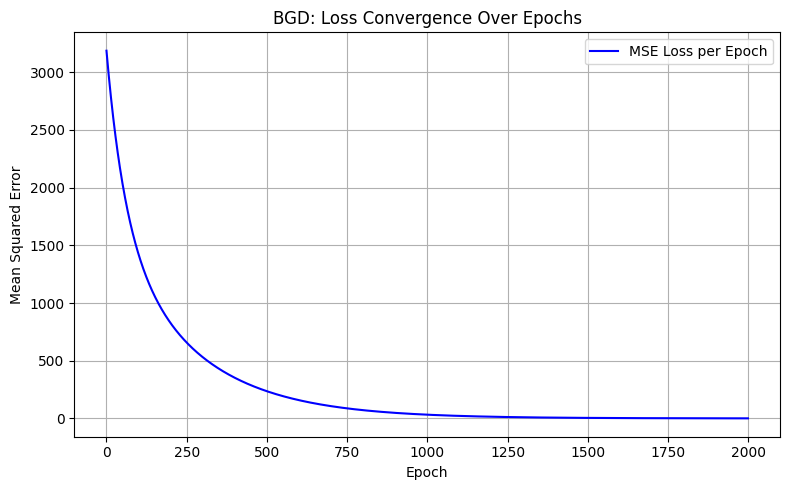

In [ ]:
y_train_pred_bgd = bgd.predict(X_train_scaled)
y_test_pred_bgd = bgd.predict(X_test_scaled)

# Evaluation metrics
train_mse_bgd = mean_squared_error(Y_train, y_train_pred_bgd)
test_mse_bgd = mean_squared_error(Y_test, y_test_pred_bgd)

train_mae_bgd = mean_absolute_error(Y_train, y_train_pred_bgd)
test_mae_bgd = mean_absolute_error(Y_test, y_test_pred_bgd)

train_r2_bgd = r2_score(Y_train, y_train_pred_bgd)
test_r2_bgd = r2_score(Y_test, y_test_pred_bgd)

# Print evaluation
print(" Batch Gradient Descent Performance:")
result = {
    "Train": pd.Series(
        [round(train_mse_bgd, 4), round(train_mae_bgd, 4), round(train_r2_bgd, 4)],
        index=["MSE", "MAE", "R²"]
    ),
    "Test": pd.Series(
        [round(test_mse_bgd, 4), round(test_mae_bgd, 4), round(test_r2_bgd, 4)],
        index=["MSE", "MAE", "R²"]
    )
}

result_df = pd.DataFrame(result)
print(result_df)

# Plot loss per epoch
plt.figure(figsize=(8, 5))
plt.plot(bgd.loss_history, label='MSE Loss per Epoch', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('BGD: Loss Convergence Over Epochs')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# **Stochastic Gradient Descent (SGD) Implementation:**

In [ ]:
# Stochastic Gradient Descent with bias and loss plot
class StochasticGradientDescent:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None
        self.loss_history = []

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        m = len(y)
        X_b = np.concatenate((np.ones((m, 1)), X), axis = 1 )  # Add bias (intercept) term
        self.theta = np.zeros(X_b.shape[1])

        for epoch in range(self.epochs):
          indices = np.random.permutation(m)
          X_shuffled = X_b[indices]
          y_shuffled = y[indices]

          for i in range(0, m):
              xi = X_shuffled[i]
              yi = y_shuffled[i]

              predictions = xi.dot(self.theta)
              error = yi - predictions

              gradient = -2 * xi.T.dot(error)

              self.theta -= self.learning_rate * gradient

          mse = np.mean(error ** 2)
          self.loss_history.append(mse)

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        return X_b.dot(self.theta)



# **Object Creation**

In [ ]:
sgd = StochasticGradientDescent(learning_rate=0.01, epochs=1000)

# **Model Training**

In [ ]:
start = time.time()
sgd.fit(X_train_scaled, Y_train)
end = time.time()
print(f"Model takes {end - start}  seconds for traing")

Model takes 16.73808717727661  seconds for traing


# **Prediction**

 Stochastic Gradient Descent Performance:
      Train    Test
MSE  0.0004  0.0005
MAE  0.0137  0.0145
R²   1.0000  1.0000


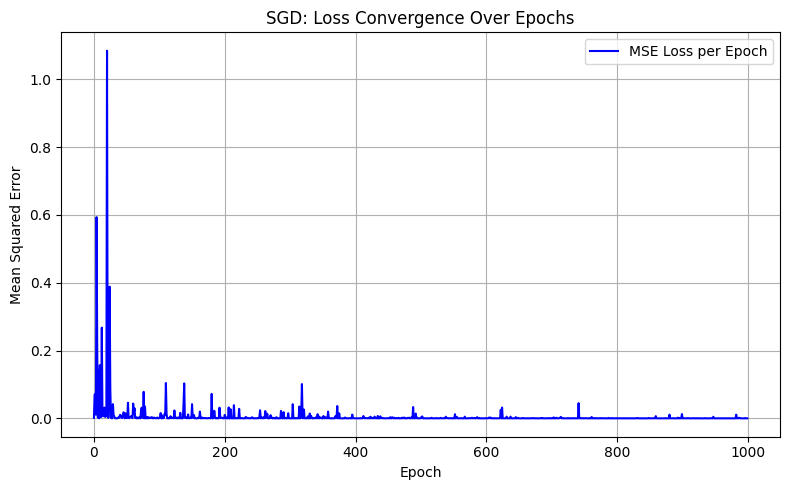

In [ ]:
y_train_pred_sgd = sgd.predict(X_train_scaled)
y_test_pred_sgd = sgd.predict(X_test_scaled)

# Metrics
train_mse_sgd = mean_squared_error(Y_train, y_train_pred_sgd)
test_mse_sgd = mean_squared_error(Y_test, y_test_pred_sgd)

train_mae_sgd = mean_absolute_error(Y_train, y_train_pred_sgd)
test_mae_sgd = mean_absolute_error(Y_test, y_test_pred_sgd)

train_r2_sgd = r2_score(Y_train, y_train_pred_sgd)
test_r2_sgd = r2_score(Y_test, y_test_pred_sgd)

# Print evaluation
print(" Stochastic Gradient Descent Performance:")
result = {
    "Train": pd.Series(
        [round(train_mse_sgd, 4), round(train_mae_sgd, 4), round(train_r2_sgd, 4)],
        index=["MSE", "MAE", "R²"]
    ),
    "Test": pd.Series(
        [round(test_mse_sgd, 4), round(test_mae_sgd, 4), round(test_r2_sgd, 4)],
        index=["MSE", "MAE", "R²"]
    )
}

result_df = pd.DataFrame(result)
print(result_df)

# Plot loss per epoch
plt.figure(figsize=(8, 5))
plt.plot(sgd.loss_history, label='MSE Loss per Epoch', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('SGD: Loss Convergence Over Epochs')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# **Mini-Batch Gradient Descent (MBGD) Implementation**

In [ ]:
class MiniBatchGradientDescent:
    def __init__(self, learning_rate=0.001, epochs=100, batch_size=64):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.theta = None
        self.loss_history = []

    def fit(self, X, y):
        X = np.array(X)            # Ensure X is NumPy array
        y = np.array(y)            # Ensure y is NumPy array
        m = len(y)

        # Add bias column
        X_b = np.concatenate((np.ones((m, 1)), X), axis=1)

        self.theta = np.random.randn(X_b.shape[1]) * 0.01

        for epoch in range(self.epochs):
            indices = np.random.permutation(m)
            X_shuffled = X_b[indices]
            y_shuffled = y[indices]

            for i in range(0, m, self.batch_size):
                xi = X_shuffled[i:i + self.batch_size]
                yi = y_shuffled[i:i + self.batch_size]

                predictions = xi.dot(self.theta)
                error = yi - predictions

                gradient = -(2 /self.batch_size) * xi.T.dot(error)

                self.theta -= self.learning_rate * gradient

            mse = np.mean(error ** 2)
            self.loss_history.append(mse)

    def predict(self, X):
        X = np.array(X)
        X_b = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        return X_b.dot(self.theta)


# **Object Creation**

In [ ]:
mbgd = MiniBatchGradientDescent(learning_rate=0.001, epochs=100, batch_size=64)  # Adjusted learning rate and added regularization


# **Model Training**

In [ ]:
start = time.time()
mbgd.fit(X_train_scaled, Y_train)
end = time.time()
print(f"The model takes {end - start} seconds for training")

The model takes 0.04044079780578613 seconds for training


# **Prediction**

 Mini Batch Gradient Descent Performance:
      Train    Test
MSE  0.1743  0.1851
MAE  0.2241  0.2236
R²   0.9999  0.9999


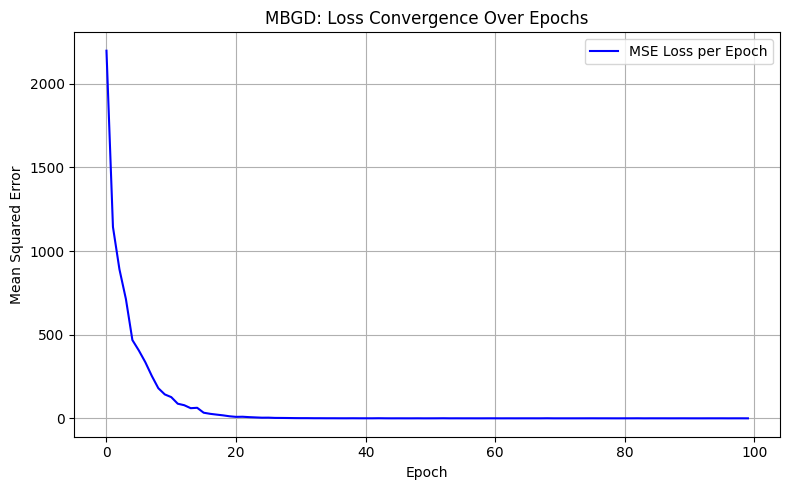

In [ ]:
# Predictions
y_train_pred_mbgd = mbgd.predict(X_train_scaled)
y_test_pred_mbgd = mbgd.predict(X_test_scaled)

# Metrics
train_mse_mbgd = mean_squared_error(Y_train, y_train_pred_mbgd)
test_mse_mbgd = mean_squared_error(Y_test, y_test_pred_mbgd)
train_mae_mbgd = mean_absolute_error(Y_train, y_train_pred_mbgd)
test_mae_mbgd = mean_absolute_error(Y_test, y_test_pred_mbgd)
train_r2_mbgd = r2_score(Y_train, y_train_pred_mbgd)
test_r2_mbgd = r2_score(Y_test, y_test_pred_mbgd)

# Print evaluation
print(" Mini Batch Gradient Descent Performance:")
result = {
    "Train": pd.Series(
        [round(train_mse_mbgd, 4), round(train_mae_mbgd, 4), round(train_r2_mbgd, 4)],
        index=["MSE", "MAE", "R²"]
    ),
    "Test": pd.Series(
        [round(test_mse_mbgd, 4), round(test_mae_mbgd, 4), round(test_r2_mbgd, 4)],
        index=["MSE", "MAE", "R²"]
    )
}

result_df = pd.DataFrame(result)
print(result_df)

# Plot loss per epoch
plt.figure(figsize=(8, 5))
plt.plot(mbgd.loss_history, label='MSE Loss per Epoch', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MBGD: Loss Convergence Over Epochs')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
